#  Amazon Sales Data Analysis

#### Problem Statement:
- Sales management has gained importance to meet increasing competition and the need
for improved methods of distribution to reduce cost and to increase profits. Sales
management today is the most important function in a commercial and business
enterprise.

**In order to achieve the problem statement i.e to reduce costs and increase profits we have analyze** 
- Optimizing Pricing and Discounts 
- Inventory management
- customer segmentation
- sales forecasting
- Promotion analysis
- process efficency
- sales performances
- cross selling and upselling

# Data preparation/Data Cleaning

In [1]:
#loading important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset
df=pd.read_excel(r"C:\Users\Lenovo\Downloads\SALESDATA.xls")
df.head(4)

,CustKey,day,months,year,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,...,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10000481,30,4,2017,-237.91,30-04-2017 00:00:00,100012,NaN,NaN,Urban Large Eggs,...,200015,30-04-2017 00:00:00,237.91,0.00,0.0,237.91,237.91,1,184,EA
1,10002220,14,7,2017,368.79,14-07-2017 00:00:00,100233,P01,20910.0,Moms Sliced Turkey,...,200245,14-07-2017 00:00:00,456.17,824.96,0.0,456.17,456.17,1,127,EA
2,10002220,17,10,2017,109.73,17-10-2017 00:00:00,116165,P01,38076.0,Cutting Edge Foot-Long Hot Dogs,...,213157,16-10-2017 00:00:00,438.93,548.66,0.0,438.93,438.93,1,127,EA
3,10002489,3,6,2017,-211.75,03-06-2017 00:00:00,100096,NaN,NaN,Kiwi Lox,...,200107,03-06-2017 00:00:00,211.75,0.00,0.0,211.75,211.75,1,160,EA


In [3]:
df.shape

(65282, 22)

In [4]:
#looking for looking null values
df.isna().sum()

CustKey                                0
day                                    0
months                                 0
year                                   0
Discount Amount                        2
Invoice Date                           0
Invoice Number                         0
Item Class                          8289
Item Number                          378
Item                                   0
Line Number                            0
List Price                             0
Order Number                           0
Promised Delivery Date                 0
Sales Amount                           0
Sales Amount Based on List Price       0
Sales Cost Amount                      0
Sales Margin Amount                    0
Sales Price                            1
Sales Quantity                         0
Sales Rep                              0
U/M                                    0
dtype: int64

In [5]:
#Dropping null values
df=df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56901 entries, 1 to 65281
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CustKey                           56901 non-null  int64  
 1   day                               56901 non-null  int64  
 2   months                            56901 non-null  int64  
 3   year                              56901 non-null  int64  
 4   Discount Amount                   56901 non-null  float64
 5   Invoice Date                      56901 non-null  object 
 6   Invoice Number                    56901 non-null  int64  
 7   Item Class                        56901 non-null  object 
 8   Item Number                       56901 non-null  float64
 9   Item                              56901 non-null  object 
 10  Line Number                       56901 non-null  int64  
 11  List Price                        56901 non-null  float64
 12  Orde

In [7]:
#Dropping columns that have low variances
df.drop(labels=['Item Number','Order Number'], axis=1,inplace=True)

In [8]:
#Converting the data types
df['Invoice Date']=pd.to_datetime(df['Invoice Date'])
df['Promised Delivery Date']=pd.to_datetime(df['Promised Delivery Date'])
#converting Categorical columns to category
df['Items Class']=df['Item Class'].astype('category')
df['U/M']=df['U/M'].astype('category')

In [9]:
# Check for negative values in relevant columns
negative_values=['Sales Amount','Sales Price','Sales Quantity','Discount Amount']
#creating boolean mask to identify rows with negative values
negative_mask=df[negative_values].lt(0).any(axis=1)
df_cleaned=df[~negative_mask]
num_dropped = len(df) - len(df_cleaned)
print(f"Dropped {num_dropped} rows with negative number")

Dropped 158 rows with negative number


In [10]:
df_cleaned=df.drop_duplicates()
num_dropped = len(df) - len(df_cleaned)
print(f"Dropped {num_dropped} duplicated rows.")

Dropped 0 duplicated rows.


In [11]:
df_cleaned.shape

(56901, 21)

# Understanding the data attributes

> ## Top Items by Sales

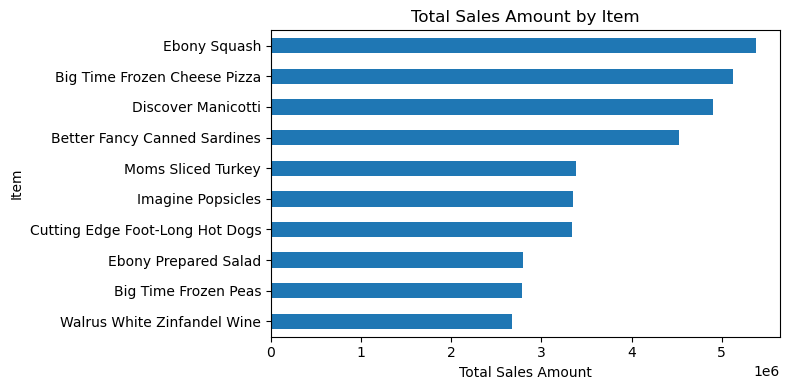

In [88]:
item_grouped=df.groupby('Item')['Sales Amount'].agg(['mean','count','sum']).sort_values(by='sum',ascending=False)
top_10_sales_items=item_grouped.head(10)
plt.figure(figsize=(8,4))
top_10_sales_items['sum'].sort_values().plot(kind='barh')
plt.title('Total Sales Amount by Item')
plt.xlabel('Total Sales Amount')
plt.ylabel('Item')
plt.tight_layout()
plt.show()

In [89]:
item_grouped.head(10)

,mean,count,sum
Item,,,
Ebony Squash,7122.978331,755,5377848.64
Big Time Frozen Cheese Pizza,5414.119504,947,5127171.17
Discover Manicotti,4352.699361,1126,4901139.48
Better Fancy Canned Sardines,2813.361647,1609,4526698.89
Moms Sliced Turkey,2841.399463,1192,3386948.16
Imagine Popsicles,2810.299362,1191,3347066.54
Cutting Edge Foot-Long Hot Dogs,3546.536645,942,3340837.52
Ebony Prepared Salad,2039.227182,1370,2793741.24
Big Time Frozen Peas,42191.311061,66,2784626.53


> ## Top mean Discount by Item

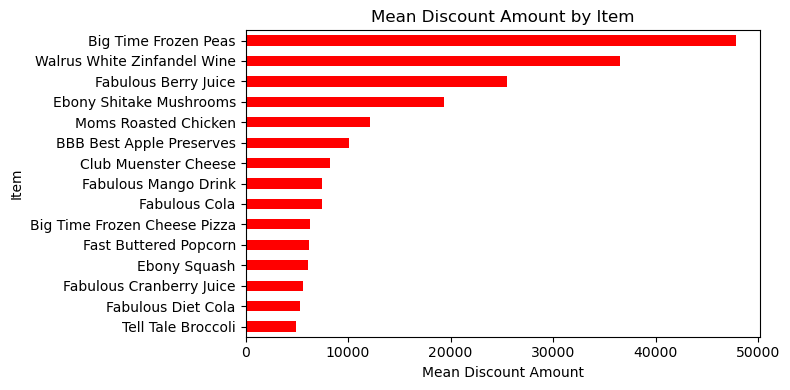

In [95]:
item_discount=df.groupby('Item')['Discount Amount'].agg(['mean']).sort_values(by='mean',ascending=False)
discount_items=item_discount.head(15)
plt.figure(figsize=(8, 4))
discount_items['mean'].sort_values().plot(kind='barh',color='red')
plt.title('Mean Discount Amount by Item')
plt.xlabel('Mean Discount Amount')
plt.ylabel('Item')
plt.tight_layout()
plt.show()

In [91]:
item_discount.head(10)

,mean
Item,
Big Time Frozen Peas,47805.639848
Walrus White Zinfandel Wine,36494.150982
Fabulous Berry Juice,25527.993600
Ebony Shitake Mushrooms,19333.606316
Moms Roasted Chicken,12125.695938
BBB Best Apple Preserves,10061.505066
Club Muenster Cheese,8275.300089
Fabulous Mango Drink,7478.090674
Fabulous Cola,7433.553307


> ## Items with High Profit

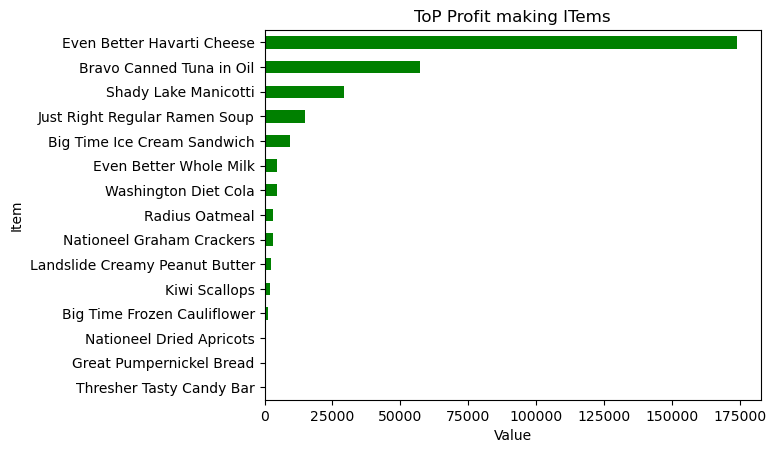

In [14]:
#Finding top items with high profit mean
df_cleaned['Profit']=df_cleaned['Sales Amount']-df_cleaned['Discount Amount']-df_cleaned['Sales Cost Amount']
item_profit=df_cleaned.groupby('Item')['Profit'].agg(['sum','count']).sort_values(by='sum',ascending=False)
Profit_item=item_profit.head(15)
Profit_item['sum'].sort_values().plot(kind='barh', color='green', label='Total Profit')
plt.title('ToP Profit making ITems')
plt.xlabel('Value')
plt.ylabel('Item')
plt.show()

### Items with discounts and Items without discounts

In [15]:
items_with_discount=df_cleaned[df_cleaned['Discount Amount']>0]
items_without_discount=df_cleaned[df_cleaned['Discount Amount']==0]

In [16]:
print("Number of Items with Discounts:", len(items_with_discount))
print("Number of Items without Discounts:", len(items_without_discount))

Number of Items with Discounts: 56236
Number of Items without Discounts: 507


In [84]:
year_grouped=df.groupby('year')['Sales Price'].agg(['sum']).sort_values(by='sum',ascending=False)
year_grouped

,sum
year,
2017,7.773359e+06
2019,7.010676e+06
2018,1.753261e+06


<AxesSubplot: ylabel='year'>

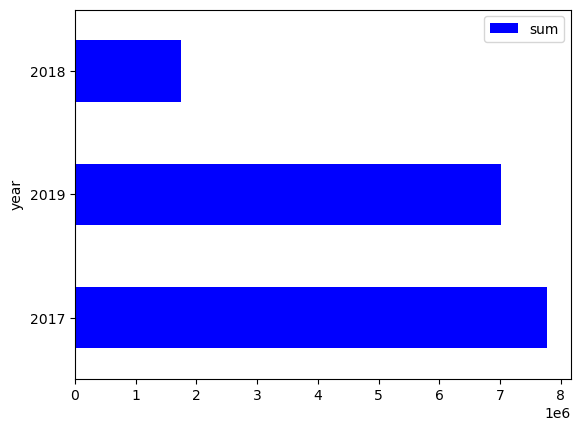

In [85]:
year_grouped.plot(kind='barh',color='blue')

- The year 2018 had the highest mean sales price, followed by 2017 and then 2019.
- The median sales prices are relatively lower than the corresponding means for all years, suggesting the possibility of outliers or skewed distributions.
- The year 2017 has the largest count of entries, which might suggest that it represents a more comprehensive dataset compared to the other years.

### Discount Spending Trends

Text(0.5, 1.0, 'Discount Spending Trends')

<Figure size 800x500 with 0 Axes>

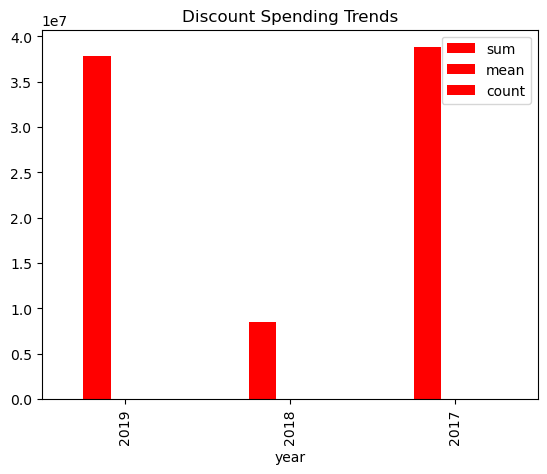

In [18]:
discount_yearly=df_cleaned.groupby('year')['Discount Amount'].agg(['sum','mean','count']).sort_values(by='mean',ascending=False)
plt.figure(figsize=(8,5))
discount_yearly.plot(kind='bar',color='red')
plt.title("Discount Spending Trends")

In [19]:
discount_yearly

,sum,mean,count
year,,,
2019,3.781492e+07,1543.907336,24493
2018,8.480677e+06,1459.166657,5812
2017,3.879745e+07,1458.770208,26596


### Discount Spending Trends:
 - The total discount amount spent in 2017 and 2019 is significantly higher than in 2018.This suggests that there may have been a strategic shift in discounting strategies.
 - the average discount per transaction in 2018 is the highest among the three years. This could imply that, on average, customers received higher discounts in 2018 compared to the other years.
 -  The high average discount amount in 2018 suggests that there might have been more targeted or substantial discounts on specific products during that year, potentially as part of a strategic marketing campaign or to clear out inventory.

## Montly Discount and Sales Patterns

In [20]:
month_grouped=df.groupby('months')['Sales Amount'].agg(['sum','count']).sort_values(by='sum',ascending=False)
month_grouped

,sum,count
months,,
3,11186810.45,6327
2,9559196.13,5618
6,8700268.84,4730
9,8593967.85,4776
1,8111503.45,5332
12,8051436.84,4912
10,7487113.95,4560
11,7046577.14,4514
8,6748366.31,4052


- The month with the highest count of entries is March (6327 entries), followed by February and January. These might be months of higher sales activity.
- The months with lower counts are typically towards the end of the year, such as October, November, December, suggesting potentially lower sales activity during this period.

- The distribution of counts across months seems to have some variability, which might indicate seasonal patterns or changes in customer behavior.

In [21]:
month_discount=df_cleaned.groupby('months')['Discount Amount'].agg(['sum','mean','count']).sort_values(by='sum',ascending=False)
month_discount

,sum,mean,count
months,,,
3,1.006652e+07,1591.041066,6327
2,8.956889e+06,1594.319794,5618
9,8.003085e+06,1675.687800,4776
6,7.778070e+06,1644.412296,4730
12,7.660539e+06,1559.556034,4912
1,7.317716e+06,1372.414927,5332
10,7.169198e+06,1572.192500,4560
11,6.736062e+06,1492.260177,4514
8,6.474947e+06,1597.963220,4052


#### Monthly Discount Patterns:

- March (3), February (2), and September (9) have the highest total discount amounts, suggesting that these months may be associated with specific sales events or promotional campaigns.
- May (5) has the lowest average discount amount compared to other months, indicating that customers might not expect significant discounts during this period.
- January (1) and June (6) have relatively high transaction counts along with moderate average discount amounts, indicating a balance between sales volume and discount strategy.

In [22]:
top_months = [3, 2, 9]
top_month_data = df_cleaned[df_cleaned['months'].isin(top_months)]
top_month_sales = top_month_data.groupby('Item')['Sales Amount'].sum().reset_index()
top_month_sales = top_month_sales.sort_values(by='Sales Amount', ascending=False)
top_month_sales.head(10)

,Item,Sales Amount
120,Discover Manicotti,2558512.60
55,Big Time Frozen Cheese Pizza,2041745.14
144,Ebony Squash,1499135.10
116,Cutting Edge Foot-Long Hot Dogs,1321017.64
48,Better Fancy Canned Sardines,1285407.33
264,Imagine Popsicles,1071775.36
141,Ebony Prepared Salad,852754.91
296,Moms Sliced Turkey,836190.15
390,Walrus White Zinfandel Wine,765483.81
330,Red Spade Turkey Hot Dogs,753202.35


In [23]:
march=df_cleaned[df_cleaned['months']==3]
sales_march = march.groupby('Item')['Discount Amount'].agg(['sum', 'mean', 'count']).sort_values(by='sum', ascending=False)
sales_march

,sum,mean,count
Item,,,
Discover Manicotti,1.085341e+06,5071.687243,214
Big Time Frozen Cheese Pizza,7.537833e+05,6979.475199,108
Better Fancy Canned Sardines,4.063365e+05,2477.661385,164
Ebony Squash,3.579609e+05,4162.336058,86
Walrus White Zinfandel Wine,3.524761e+05,20733.888135,17
...,...,...,...
Radius Oatmeal,9.120000e+00,1.520000,6
Club Low Fat Cottage Cheese,4.250000e+00,1.416667,3
Big Time Ice Cream Sandwich,-6.149000e+01,-30.745000,2


## Optimizing Pricing and Discounts

- 1:Key metrics
    -  Discount effectivness
    - Sales margin
    - Sales Quantity and Price 

- 2:Correlation Analysis

- 3:Visualization:

- 4:Hypothesis testing

In [24]:
#Discount effextivness
total_discount=df_cleaned['Discount Amount'].sum()
Total_sales=df_cleaned['Sales Amount'].sum()
Average_Discount_percentage=total_discount/Total_sales
print("On an average customer recived a disount about ",Average_Discount_percentage , "on their purchases" )

On an average customer recived a disount about  0.9197224186584395 on their purchases


**Note**
- On an average customers received a discount about 91% on thier purchases.This provides an extensive information into the extent of discount given to customers.
- This could indicate anomalies or issues such as outliers or skewness.

In [25]:
#sales Margin
total_sales_cost_amount=df_cleaned['Sales Cost Amount'].sum()
total_sales_transactions = len(df_cleaned)
average_sales_amount = Total_sales / total_sales_transactions
average_sales_cost_amount = total_sales_cost_amount / total_sales_transactions
average_sales_margin = average_sales_amount - average_sales_cost_amount
print("Average Sales Margin:", average_sales_margin)

Average Sales Margin: 709.9814845081809


In [26]:
#Sales Quantity and Price
total_sales_quantity=df_cleaned['Sales Quantity'].sum()
total_sales_amount=df_cleaned['Sales Amount'].sum()
Average_sales_quantity=total_sales_quantity/total_sales_transactions
average_sales_price = total_sales_amount / total_sales_transactions
print("Average sales quantity:",Average_sales_quantity )
print("Average sales price:",average_sales_price )

Average sales quantity: 9.513751955150173
Average sales price: 1625.9883365845944


**Average Sales Quantity (9.53 units)**:
-  This indicates that, on average, each sales transaction involves the purchase of approximately 9.53 units of the product.
- This metric gives  an idea of the typical quantity that customers tend to buy in a single transaction.

**Average Sales Price ($1627.14)**:
-  This represents the average amount of money customers are spending per sales transaction.
-  It provides an understanding of the price point at which customers are buying your products.

In [27]:
corr_df = ['Discount Amount', 'Sales Amount']
Discount_sales = df_cleaned[corr_df]
correlation=Discount_sales.corr()
correlation

,Discount Amount,Sales Amount
Discount Amount,1.000000,0.964668
Sales Amount,0.964668,1.000000


**Note**
- Interpreting this correlation:

A correlation coefficient close to 1 suggests that as the "Discount Amount" increases, the "Sales Amount" also tends to increase. In other words, there is a strong positive relationship between offering discounts and higher sales amounts.

In [46]:
Discount_margin=['Discount Amount','Sales Margin Amount']
Discount_margin_df=df_cleaned[Discount_margin]
Discount_margin_corr=Discount_margin_df.corr()
Discount_margin_corr

,Discount Amount,Sales Margin Amount
Discount Amount,1.000000,0.907782
Sales Margin Amount,0.907782,1.000000


**Note**
- Interpreting the correlation:

The strong positive correlation suggests that as the "Discount Amount" increases, the "Sales Margin Amount" also tends to increase. In other words, there is a significant positive relationship between offering discounts and higher sales margins.

Text(0.5, 1.0, 'Correlation Matrix')

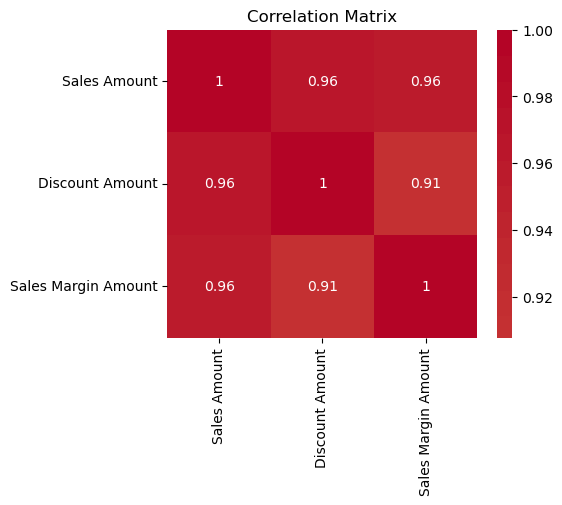

In [60]:
correlation_df=df_cleaned[['Sales Amount','Discount Amount','Sales Margin Amount']]
correlation_df = correlation_df.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")


In [29]:
# Plotting Data to understand the relationship between Discount amount, Sales Amount, Sales margin Amount

> Discount Vs Sales Amount

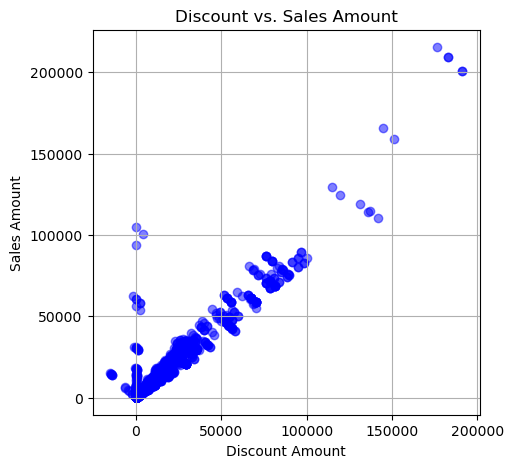

In [30]:
plt.figure(figsize=(5,5))
plt.scatter(df_cleaned['Discount Amount'],df_cleaned['Sales Amount'],color='blue',alpha=0.5)
plt.xlabel('Discount Amount')
plt.ylabel('Sales Amount')
plt.title('Discount vs. Sales Amount')
plt.grid(True)
plt.show()

> Dicount Vs Sales margin amount

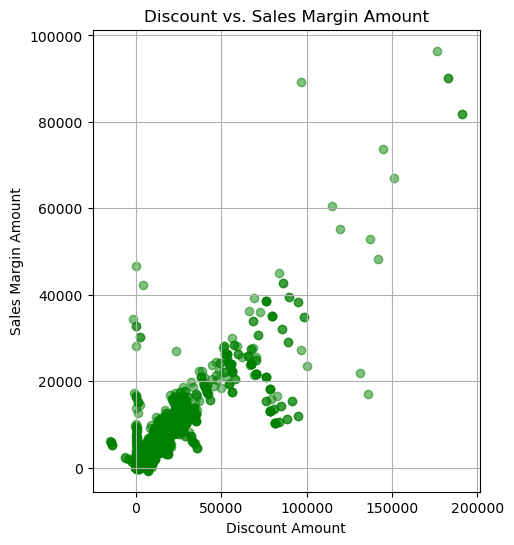

In [31]:
plt.figure(figsize=(5, 6))
plt.scatter(df_cleaned['Discount Amount'], df_cleaned['Sales Margin Amount'], color='green', alpha=0.5)
plt.xlabel('Discount Amount')
plt.ylabel('Sales Margin Amount')
plt.title('Discount vs. Sales Margin Amount')
plt.grid(True)
plt.show()

### Hypothesis testing
- Null Hypothesis (H0): There is no significant impact of changes in pricing and discount strategies on sales and margins.
- Alternative Hypothesis (H1): There is a significant impact of changes in pricing and discount strategies on sales and margins.

In [32]:
import statsmodels.api as sm
X = df_cleaned[['Discount Amount', 'List Price']]
y_sales = df_cleaned['Sales Amount']
y_margin = df_cleaned['Sales Margin Amount']

# Adding a constant to the independent variables matrix
X = sm.add_constant(X)
model_sales = sm.OLS(y_sales, X).fit()
model_margin = sm.OLS(y_margin, X).fit()
print("Regression Summary for Sales Amount:")
print(model_sales.summary())


Regression Summary for Sales Amount:
                            OLS Regression Results                            
Dep. Variable:           Sales Amount   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 3.852e+05
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:04:04   Log-Likelihood:            -4.9135e+05
No. Observations:               56901   AIC:                         9.827e+05
Df Residuals:                   56898   BIC:                         9.827e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const

**Note**
-  The model explains 93.1% of Sales Amount variance, indicating its effectiveness in predicting sales behavior.
- The coef for discount Amount(0.96%)shows the positive impact on Sales Amount,with a unit increase in discount leads to increase in sales.
- Higher List prices correlate with higher sales Amount,showing on approximately 0.29 units increases per unit icrease in list price.
- The model is statistically significant in explaining Sales Amount variance, supported by a significant F-statistic (Prob < 0.05).
- The model's high R-squared implies strong predictive capabilities

In [33]:
# Print regression summary for sales margin amount
print("Regression Summary for Sales Margin Amount:")
print(model_margin.summary())

Regression Summary for Sales Margin Amount:
                             OLS Regression Results                            
Dep. Variable:     Sales Margin Amount   R-squared:                       0.825
Model:                             OLS   Adj. R-squared:                  0.825
Method:                  Least Squares   F-statistic:                 1.342e+05
Date:                 Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                         22:04:04   Log-Likelihood:            -4.6931e+05
No. Observations:                56901   AIC:                         9.386e+05
Df Residuals:                    56898   BIC:                         9.387e+05
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

**Note**
- The regression model explains approximately 82.5% of the variance in Sales Margin Amount, indicating a strong ability to predict margin behavior.
-  The coefficient for Discount Amount (0.3842) is statistically significant (low p-value), suggesting that discounts positively impact Sales Margin Amount. For each unit increase in Discount Amount, Sales Margin Amount increases by approximately 0.3842 units, while other factors are held constant.
-  The coefficient for List Price (0.1630) is also statistically significant. This implies that higher list prices are associated with higher Sales Margin Amount. For each unit increase in List Price, Sales Margin Amount increases by approximately 0.1630 units, all else being equal.
- The high R-squared value suggests strong predictive power. 

### Inventory Management:

In [34]:
df_cleaned.head(3)

,CustKey,day,months,year,Discount Amount,Invoice Date,Invoice Number,Item Class,Item,Line Number,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Items Class,Profit
1,10002220,14,7,2017,368.79,2017-07-14,100233,P01,Moms Sliced Turkey,1000,...,456.17,824.96,0.0,456.17,456.170000,1,127,EA,P01,87.38
2,10002220,17,10,2017,109.73,2017-10-17,116165,P01,Cutting Edge Foot-Long Hot Dogs,1000,...,438.93,548.66,0.0,438.93,438.930000,1,127,EA,P01,329.20
4,10004516,27,5,2017,96627.94,2017-05-27,103341,P01,High Top Sweet Onion,1000,...,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE,P01,-7379.28


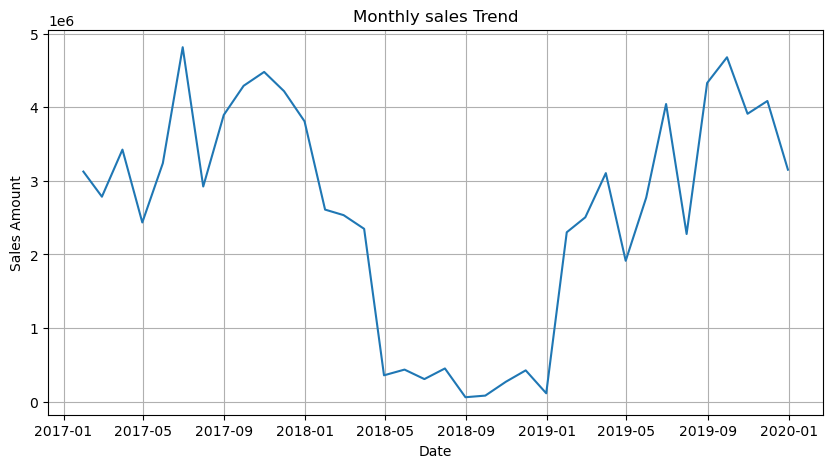

In [35]:
df_cleaned.set_index('Invoice Date',inplace=True)
montly_sales=df_cleaned['Sales Amount'].resample('M').sum()

#plotting the data
plt.figure(figsize=(10,5))
plt.plot(montly_sales)
plt.title('Monthly sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()

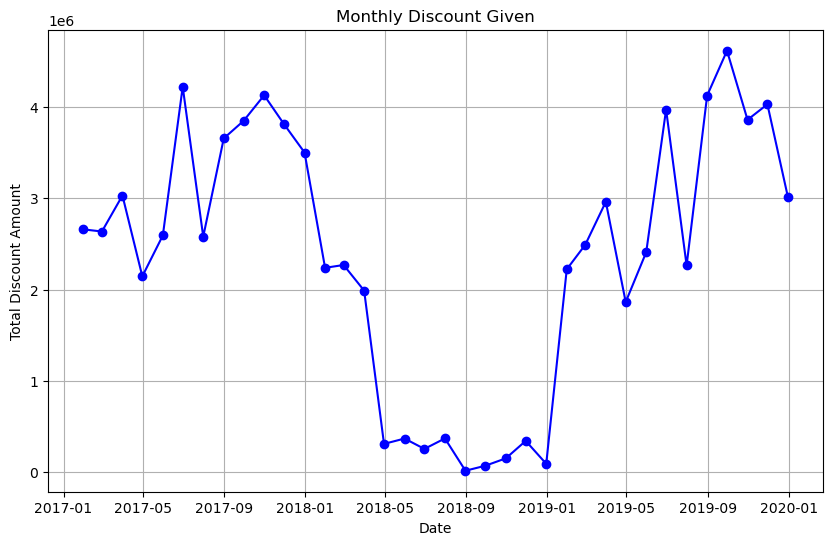

In [36]:
montly_discount=df_cleaned['Discount Amount'].resample('M').sum()
# Plot the monthly discount data
plt.figure(figsize=(10, 6))
plt.plot(montly_discount, marker='o', linestyle='-', color='b')
plt.title('Monthly Discount Given')
plt.xlabel('Date')
plt.ylabel('Total Discount Amount')
plt.grid(True)
plt.show()

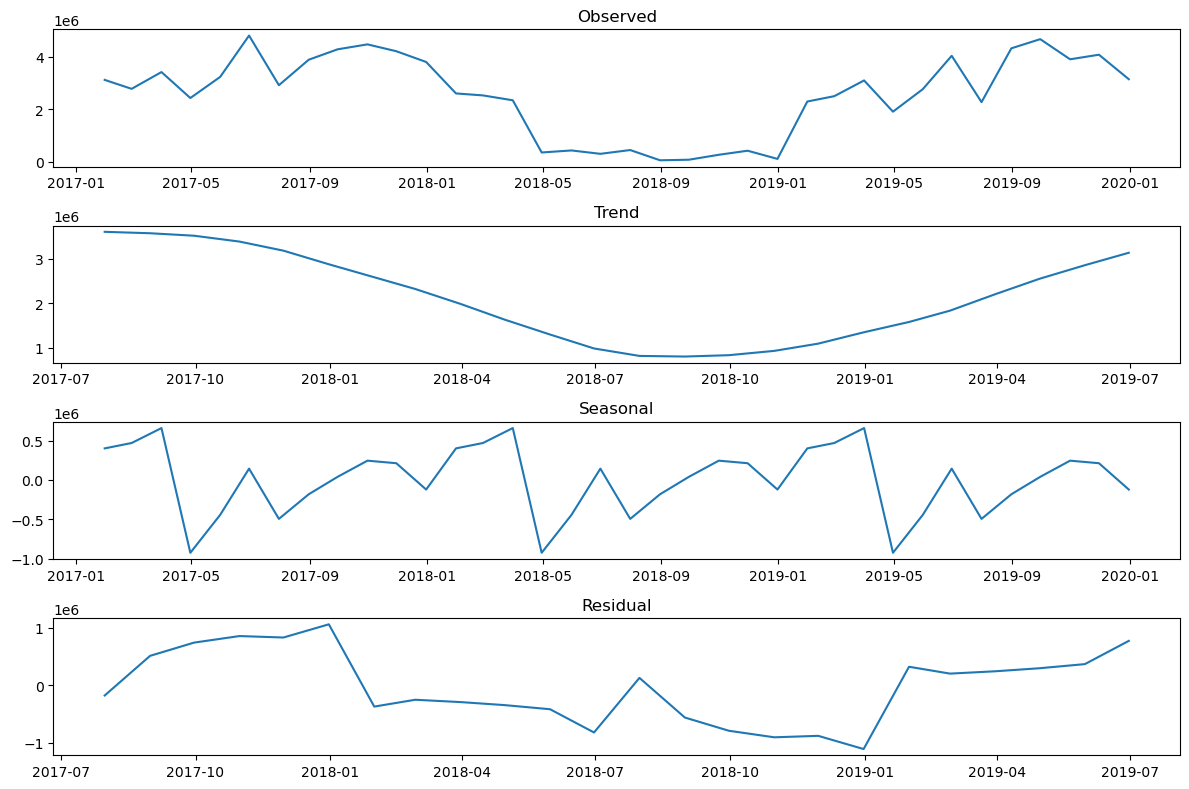

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(montly_sales, model='additive')

# Plot decomposition results
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Observed')
plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')
plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residual')
plt.tight_layout()
plt.show()

In [38]:
# Calculate Recency, Frequency, and Monetary metrics
current_date = df['Invoice Date'].max()
customer_rfm = df.groupby('CustKey').agg(
    Recency=('Invoice Date', lambda x: (current_date - x.max()).days),
    Frequency=('Invoice Date', 'count'),
    Monetary=('Sales Amount', 'sum')
).reset_index()

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_rfm_scaled = scaler.fit_transform(customer_rfm[['Recency', 'Frequency', 'Monetary']])
customer_rfm_scaled = pd.DataFrame(customer_rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

In [61]:
from sklearn.cluster import KMeans
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_rfm['cluster'] = kmeans.fit_predict(customer_rfm_scaled)

In [62]:
customer_rfm.head(5)

,CustKey,Recency,Frequency,Monetary,cluster
0,10000453,1,307,170573.46,1
1,10000455,782,11,11176.08,2
2,10000456,50,91,221232.81,1
3,10000457,39,15,14720.31,1
4,10000458,209,6,101881.83,1


In [63]:
cluster_labels = {
    0: 'low value Customers',
    1: 'High value Customers',
    2: 'Median Value Customer'
}

In [83]:
customer_rfm['Cluster Label'] = customer_rfm['cluster'].map(cluster_labels)
value_counts_customer=customer_rfm['Cluster Label'].value_counts()

<AxesSubplot: >

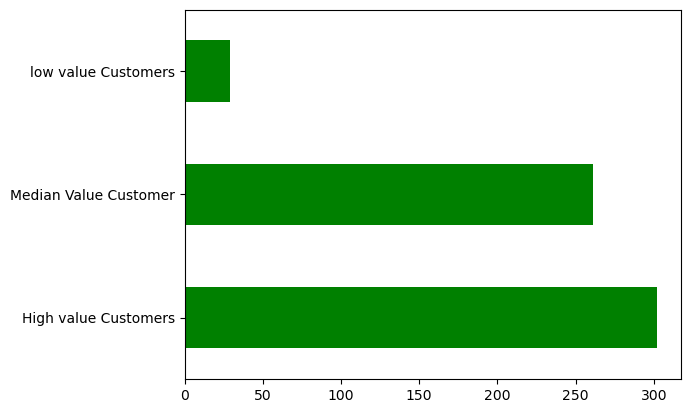

In [82]:
value_counts_customer.plot(kind='barh',color='green')

Text(0.5, 1.0, 'Monetary Distribution')

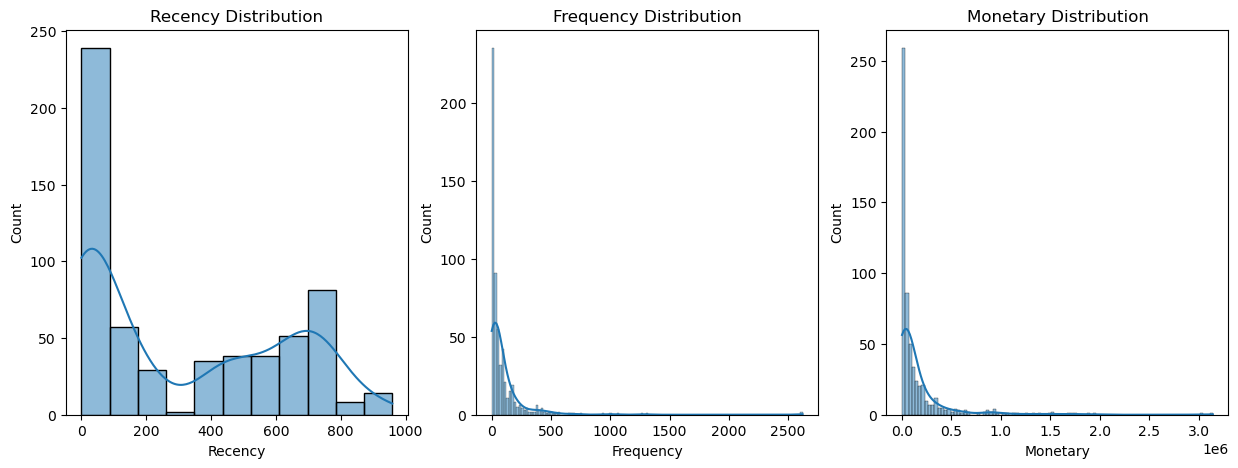

In [72]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=customer_rfm, x='Recency', ax=axs[0], kde=True)
axs[0].set_title('Recency Distribution')
sns.histplot(data=customer_rfm,x='Frequency',ax=axs[1],kde=True)
axs[1].set_title('Frequency Distribution')
sns.histplot(data=customer_rfm,x='Monetary',ax=axs[2],kde=True)
axs[2].set_title('Monetary Distribution')

<AxesSubplot: xlabel='cluster'>

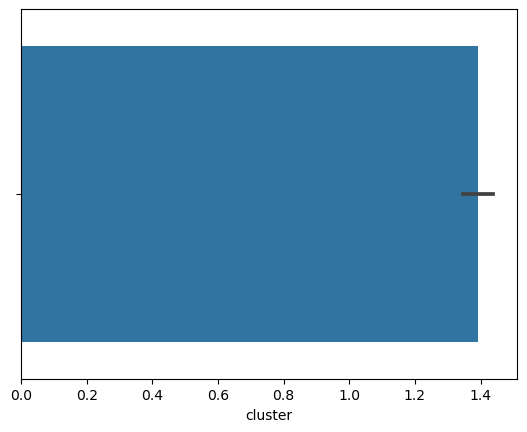

In [73]:
sns.barplot(data=customer_rfm,x='cluster',)

### Insights and Recommendations:

Based on the Amazon sales data analysis, here are some key insights and recommendations:

**Optimizing Pricing and Discounts:**

- Discount Effectiveness: On average, customers receive a discount of around 91% on their purchases. This suggests the need for a closer analysis of your discount strategies. Such a high discount rate might indicate anomalies or potential issues that need to be addressed.
- Sales Margin: The average sales margin is approximately 710. This indicates the profit generated per transaction after accounting for sales costs.
- Sales Quantity and Price: The average sales quantity is around 9.53 units per transaction, with an average sales price of 1626.

**Correlation Analysis and Hypothesis Testing:**

There is a strong positive correlation between discounts and both sales amount and sales margin. This suggests that offering discounts can lead to increased sales and margins, confirming the importance of strategic discounting.

**Inventory Management:**

- Monthly Sales Trend: The monthly sales trend shows fluctuations over time, indicating potential seasonal patterns. These patterns can influence inventory planning, staffing, and marketing efforts.
- Seasonal Decomposition: The seasonal decomposition of sales data reveals trends, seasonality, and residual components.

**Customer Segmentation:**

- Based on the Recency, Frequency, and Monetary (RFM) analysis, customers have been segmented into three clusters: low-value, high-value, and median-value customers.
- Recommendation: Tailor marketing and engagement strategies for each customer segment. High-value customers might be targeted with loyalty programs or personalized offers, while strategies to increase engagement with low-value customers can be explored.

**Sales Performance Analysis:**

- Certain items, such as "Better Fancy Canned Sardines" and "Ebony Prepared Salad," have higher sales counts, indicating their popularity.
- Recommendation: Identify the characteristics that make these items successful and consider applying similar strategies to other products.

**Yearly and Monthly Analysis:**

- The year 2018 had the highest mean sales price, followed by 2017 and then 2019.
- The months with the highest count of entries are March, February, and January, suggesting higher sales activity during these months.
- The months with the highest mean discount amount are September, August, and June.
- Recommendation: Leverage the insights gained from yearly and monthly analysis to optimize inventory, plan promotions, and allocate resources effectively.

